<a href="https://colab.research.google.com/github/kiranpjclement/Basic_HTML_Codes_Ref/blob/main/TITANIC_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [16]:
df=pd.read_csv("/content/titanic_train.csv")
df2=pd.read_csv("/content/titanic_test.csv")  #test data

In [17]:
df.shape

(891, 12)

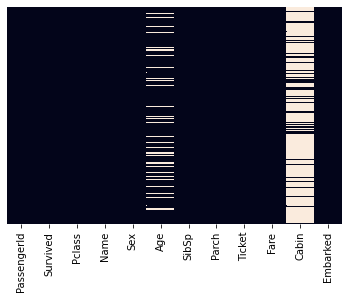

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
for i in df.columns:
    d=dict(df[i].isnull().value_counts())
    print(i,d)

PassengerId {False: 891}
Survived {False: 891}
Pclass {False: 891}
Name {False: 891}
Sex {False: 891}
Age {False: 714, True: 177}
SibSp {False: 891}
Parch {False: 891}
Ticket {False: 891}
Fare {False: 891}
Cabin {True: 687, False: 204}
Embarked {False: 889, True: 2}


###### Handling Na in Embarked

In [21]:
f=df['Embarked'].isna()
df.loc[f]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [22]:
df.loc[f,'Embarked'] ='S'  #Ticket and cabin same for both the passenger, so assumed boarded from same location

###### Handling Nan in Age Columns

###### Getting the avg age of male and female for all the classes

In [23]:
dfmale=df.loc[df['Sex']=='male']    
dffemale=df.loc[df['Sex']=='female']

In [24]:
g=dfmale.groupby(['Pclass'])
g['Age'].median()

Pclass
1    40.0
2    30.0
3    25.0
Name: Age, dtype: float64

In [25]:
g=dffemale.groupby(['Pclass'])
g['Age'].median()

Pclass
1    35.0
2    28.0
3    21.5
Name: Age, dtype: float64

In [26]:
f1=(df['Age'].isnull()) & (df['Sex']=='male') & (df['Pclass']==1)  #fillted the missing Age for men with median age of men
df.loc[f1,'Age']=40.0

In [27]:
f2=(df['Age'].isnull()) & (df['Sex']=='male') & (df['Pclass']==2)  #fillted the missing Age for men with median age of men
df.loc[f2,'Age']=30.0

In [28]:
f3=(df['Age'].isnull()) & (df['Sex']=='male') & (df['Pclass']==3)  #fillted the missing Age for men with median age of men
df.loc[f3,'Age']=25

In [29]:
f4=(df['Age'].isnull()) & (df['Sex']=='female') & (df['Pclass']==1)  #fillted the missing Age for men with median age of men
df.loc[f4,'Age']=35.0

In [30]:
f5=(df['Age'].isnull()) & (df['Sex']=='female') & (df['Pclass']==2)  #fillted the missing Age for men with median age of men
df.loc[f5,'Age']=28.0

In [31]:
f6=(df['Age'].isnull()) & (df['Sex']=='female') & (df['Pclass']==3)  #fillted the missing Age for men with median age of men
df.loc[f6,'Age']=21.5

In [32]:
df['Age'].isnull().value_counts()

False    891
Name: Age, dtype: int64

###### used the same median value from the train to fill the test data

In [33]:
f7=(df2['Age'].isnull()) & (df2['Sex']=='male') & (df2['Pclass']==1)  #fillted the missing Age for men with median age of men
df2.loc[f7,'Age']=40.0

In [34]:
f8=(df2['Age'].isnull()) & (df2['Sex']=='male') & (df2['Pclass']==2)  #fillted the missing Age for men with median age of men
df2.loc[f8,'Age']=30.0

In [35]:
f9=(df2['Age'].isnull()) & (df2['Sex']=='male') & (df2['Pclass']==3)  #fillted the missing Age for men with median age of men
df2.loc[f9,'Age']=25

In [36]:
f10=(df2['Age'].isnull()) & (df2['Sex']=='female') & (df2['Pclass']==1)  #fillted the missing Age for men with median age of men
df2.loc[f10,'Age']=35.0

In [37]:
f11=(df2['Age'].isnull()) & (df2['Sex']=='female') & (df2['Pclass']==2)  #fillted the missing Age for men with median age of men
df2.loc[f11,'Age']=28.0

In [38]:
f12=(df2['Age'].isnull()) & (df2['Sex']=='female') & (df2['Pclass']==3)  #fillted the missing Age for men with median age of men
df2.loc[f12,'Age']=21.5

In [39]:
df2['Age'].isnull().value_counts()

False    418
Name: Age, dtype: int64

###### Handling Fare

In [40]:
f5=df2['Fare'].isnull()
df2.loc[f5]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [41]:
g3=df.groupby(['Embarked'])
g3['Fare'].median()


Embarked
C    29.70
Q     7.75
S    13.00
Name: Fare, dtype: float64

In [42]:
df2.loc[f5,'Fare']=13  #filled with median fare of Embarked 'S'

##### Creating X and y data

In [43]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [44]:
X=df[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']]

In [45]:
y=df['Survived']

In [46]:
Xt=df2[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']]

##### One Hot Encoding

In [47]:
temp_x1=pd.get_dummies(X['Embarked'],drop_first=True)
X=pd.concat([X,temp_x1],axis=1)
X.drop(columns='Embarked',inplace=True)

###### Test -[Embarked]

In [48]:
temp_xt1=pd.get_dummies(Xt['Embarked'],drop_first=True) 
Xt=pd.concat([Xt,temp_xt1],axis=1)
Xt.drop(columns='Embarked',inplace=True)

In [49]:
temp_x2=pd.get_dummies(X['Sex'],drop_first=True) 
X=pd.concat([X,temp_x2],axis=1)
X.drop(columns='Sex',inplace=True)

In [50]:
temp_xt2=pd.get_dummies(Xt['Sex'],drop_first=True) 
Xt=pd.concat([Xt,temp_xt2],axis=1)
Xt.drop(columns='Sex',inplace=True)

#### Split model

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)

In [52]:
X.shape

(891, 8)

In [53]:
Xt.shape

(418, 8)

In [ ]:
SVM

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [97]:
print(clf.score(X_test,y_test))
print(clf.score(X_train,y_train))

0.8379888268156425
0.848314606741573


In [129]:
test_clf=[]
train_clf=[]
index_data=[]
for  i in (.5,.7,.9,1,1.2,1.4,1.6,1.8):
  clf = make_pipeline(StandardScaler(), SVC(C=i,gamma='auto'))
  clf.fit(X, y)
  print(i,clf.score(X_test,y_test))
  print(i,clf.score(X_train,y_train))
  test_clf.append(clf.score(X_test,y_test))
  train_clf.append(clf.score(X_train,y_train))
  index_data.append(i)

0.5 0.8212290502793296
0.5 0.8398876404494382
0.7 0.8212290502793296
0.7 0.8455056179775281
0.9 0.8379888268156425
0.9 0.848314606741573
1 0.8379888268156425
1 0.848314606741573
1.2 0.8491620111731844
1.2 0.848314606741573
1.4 0.8435754189944135
1.4 0.8469101123595506
1.6 0.8435754189944135
1.6 0.8469101123595506
1.8 0.8435754189944135
1.8 0.8469101123595506


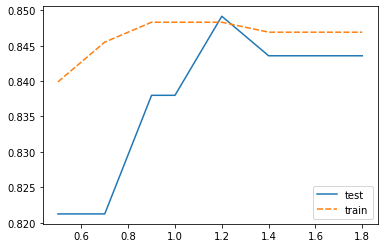

In [139]:
scoredf=pd.DataFrame({'test':test_clf,'train':train_clf},index=index_data)
sns.lineplot(data=scoredf)

In [133]:
clf = make_pipeline(StandardScaler(), SVC(C=1.2,gamma='auto'))
clf.fit(X, y)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.2, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [136]:
y_pred_svm=clf.predict(Xt)
y_pred_svm

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [137]:
submission=pd.DataFrame({"PassengerId" : df2['PassengerId'],"Survived" :y_predlog})
submission.to_csv("titanic_svm.csv",index=False)